# Support Vector Machines

## Setup

In [5]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("Support-Vector-Machines"):
    raise ValueError("Please change working directory to 'path/Classifying-the-MNIST' before proceeding")

Current working directory:  /Users/irellzane/MLprojects/Support-Vector-Machines


In [6]:
!pip install -r requirements.txt

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [8]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Train SVM classifier

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

X = iris.data[["petal length (cm)", "petal width (cm)"]]
y = (iris.target == 2)

svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, random_state=42, dual=True))

svm_clf.fit(X.values, y)
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [10]:
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

## Decision Boundary

In [11]:
from sklearn.svm import SVC

X = X[(iris.target == 0) | (iris.target == 1)]
y = iris.target[(iris.target == 0) | (iris.target == 1)]


svm_clf = SVC(kernel="linear", C=1e100)
svm_clf.fit(X.values, y)

SVC(C=1e+100, kernel='linear')

In [45]:
def plt_svc(svm_clf):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    x0 = np.linspace(-5, 5.5, 500)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]
    margin = 1/w[1]
    support_vectors = svm_clf.support_vectors_
    support_vectors
    plt.plot(x0, decision_boundary, "k")
    plt.plot(x0, decision_boundary - margin, "k--")
    plt.plot(x0, decision_boundary + margin, "k--")
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=200, c="grey", alpha=0.8,zorder=-1)
    plt.axis([0, 5.5, 0, 2])
    plt.legend(loc="lower right")

In [46]:
plt.figure(figsize=(7, 3))
plt.plot(X["petal length (cm)"][y==0], X["petal width (cm)"][y==0], "bs", label="Iris Setosa")
plt.plot(X["petal length (cm)"][y==1], X["petal width (cm)"][y==1], "yo", label="Iris Versicolor")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt_svc(svm_clf)
plt.show()

IndexError: Boolean index has wrong length: 9 instead of 100

<Figure size 700x300 with 0 Axes>

## Hard margin vs Soft Margin

In [ ]:
outlier = np.array([[3.2, 0.8]])

X_o = np.concatenate([X.values, outlier])
y_o = np.concatenate([y, np.array([0])])

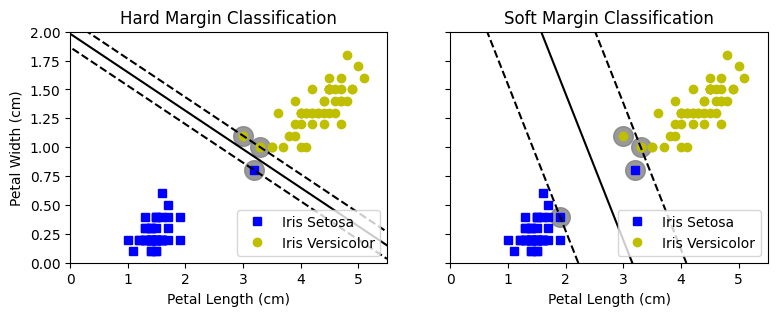

In [47]:
svm_clf_hard = SVC(kernel="linear", C=10**9)
svm_clf_soft = SVC(kernel="linear", C=1)

svm_clf_hard.fit(X_o, y_o)
svm_clf_soft.fit(X_o, y_o)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 3), sharey=True)

plt.sca(ax1)
plt.title("Hard Margin Classification")
plt.plot(X_o[:, 0][y_o==0], X_o[:, 1][y_o==0], "bs", label="Iris Setosa")
plt.plot(X_o[:, 0][y_o==1], X_o[:, 1][y_o==1], "yo", label="Iris Versicolor")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt_svc(svm_clf_hard)

plt.sca(ax2)
plt.title("Soft Margin Classification")
plt.plot(X_o[:, 0][y_o==0], X_o[:, 1][y_o==0], "bs", label="Iris Setosa")
plt.plot(X_o[:, 0][y_o==1], X_o[:, 1][y_o==1], "yo", label="Iris Versicolor")
plt.xlabel("Petal Length (cm)")
plt_svc(svm_clf_soft)

## Nonlinear SVM Classification

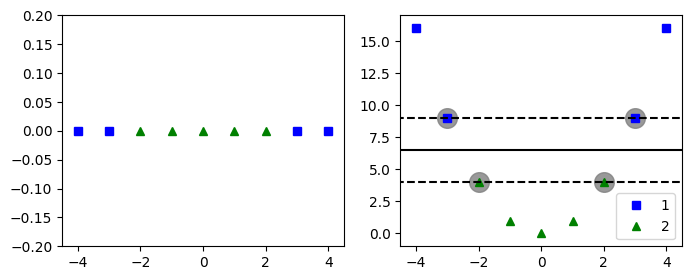

In [64]:
X_1D = np.linspace(-4, 4, 9)
X_2D = np.c_[X_1D, X_1D**2]

y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

svm_clf = SVC(kernel="linear", C=10**9)
svm_clf.fit(X_2D, y)

plt.figure(figsize=(8, 3))
plt.subplot(121)
plt.plot(X_1D[y==0], np.zeros(4), "bs")
plt.plot(X_1D[y==1], np.zeros(5), "g^")
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.plot(X_2D[:, 0][y==0], X_2D[:, 1][y==0], "bs", label="1")
plt.plot(X_2D[:, 0][y==1], X_2D[:, 1][y==1], "g^", label="2")
plt_svc(svm_clf)
plt.axis([-4.5, 4.5, -1, 17])

plt.show()

## Polynomial Kernel SVM

In [65]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svc = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10000, random_state=42)
)

polynomial_svc.fit(X, y)

/Users/irellzane/MLprojects/Support-Vector-Machines/.venv/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

In [89]:
def plot_moons(X, y):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis([-1.5, 2.4, -1, 1.5])

def plot_predictions(clf):
   x_axis = np.linspace(-1.5, 2.5, 100)
   y_axis = np.linspace(-1, 1.5, 100)
   x_coords, y_coords = np.meshgrid(x_axis, y_axis)
   X = np.c_[x_coords.ravel(), y_coords.ravel()]
   y_pred = clf.predict(X).reshape(x_coords.shape)
   plt.contourf(x_coords, y_coords, y_pred, alpha=0.2)

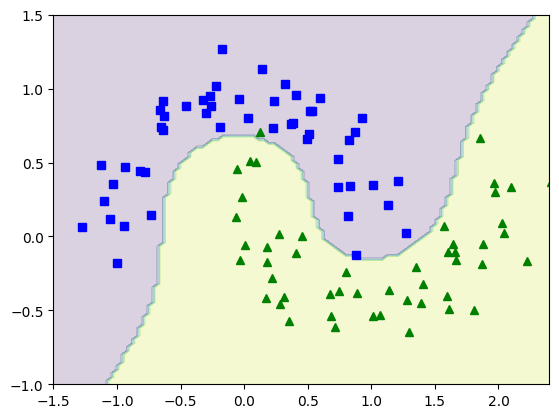

In [90]:
plot_moons(X, y)
plot_predictions(polynomial_svc)
plt.show()